#Importing libraries
In this cell, we import the pandas library for data manipulation, numpy for numerical operations, and scipy's stats module for statistical analysis.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files

#Load Datasett
This cell allows you to upload the dataset file (Automatically) and load it into a pandas DataFrame for further analysis.

In [58]:
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully")
        return df
    except FileNotFoundError:
        print("File not found. Please upload the correct file.")
    except Exception as e:
        print(f"An error occurred: {e}")

file_path = 'combined.csv'
df = load_dataset(file_path)

Dataset loaded successfully


# Convert data types
This cell converts the 'Price', 'Bedrooms', 'Bathrooms', and 'Area' columns to numeric types, handles 'Unknown' values by replacing them with NaN, and removes rows with missing values in key columns.


In [59]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Previewing and cleaning the data
In this cell, we preview the data to understand its structure, convert the 'Price' column to numeric, and drop rows with missing values in the 'Price' or 'Payment_Option' columns.


In [60]:
def preview_data(df):
    print("Data Preview:")
    print(df.head())

    print("\nData Info:")
    print(df.info())

    print("\nSummary Statistics:")
    print(df.describe())

preview_data(df)


Data Preview:
        Type      Price  Bedrooms  Bathrooms   Area Furnished Level  \
0  Apartment  1980000.0       3.0        3.0  148.0        No     3   
1  Apartment  4724000.0       2.0        2.0  120.0   Unknown     3   
2  Apartment   355000.0       3.0        2.0  109.0   Unknown     2   
3  Apartment  3000000.0       2.0        2.0  128.0        No     2   
4  Apartment  2900000.0       2.0        2.0  120.0   Unknown     1   

      Compound       Payment_Option  Delivery_Date  Delivery_Term  \
0        Nyoum  Cash or Installment           2024  Semi Finished   
1  Sun Capital  Cash or Installment           2025       Finished   
2      Unknown      Unknown Payment           soon        Unknown   
3  Bloomfields  Cash or Installment           soon   Not Finished   
4  Sun Capital          Installment  Ready to move        Unknown   

                     City       Ad_Date Scraping_Date  
0              Asyut City    5 days ago    2023-03-13  
1          6th of October    4 d

In [61]:
df.replace('Unknown', np.nan, inplace=True)
df.dropna(subset=['Price', 'Bedrooms', 'Bathrooms', 'Area', 'Payment_Option'], inplace=True)

# Detecting and treating outliers
This cell uses the IQR method to identify and remove outliers from the 'Price' column, and then plots the distribution of the cleaned data.


Outliers removed from Price. Rows before: 12565, After: 12146


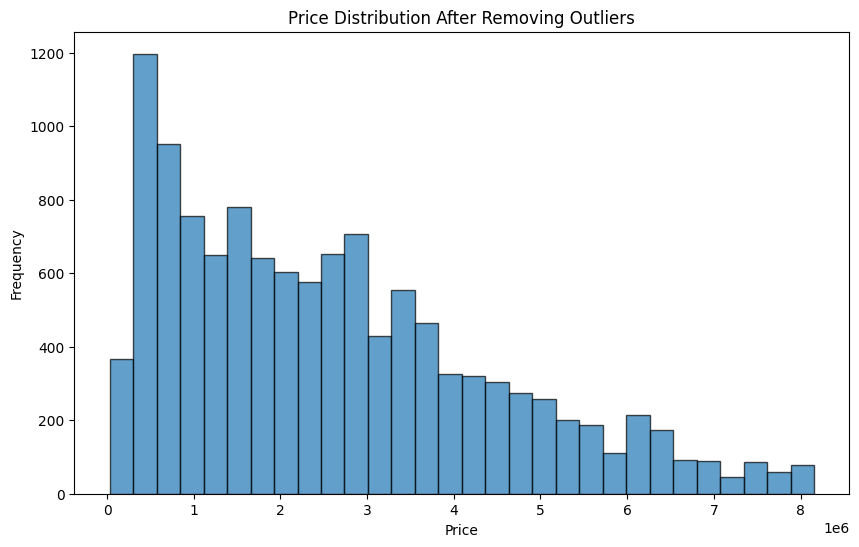

In [62]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Outliers removed from {column}. Rows before: {initial_count}, After: {df.shape[0]}")
    return df

df = remove_outliers(df, 'Price')

# Plot the distribution of the cleaned data
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Price Distribution After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Splitting data by payment method
This cell splits the data into two groups based on the 'Payment_Option' column: one for cash payments and another for installment payments.


In [63]:
def split_data(df, column, condition):
    group_1 = df[df[column].str.contains(condition[0], case=False, na=False)]['Price']
    group_2 = df[df[column].str.contains(condition[1], case=False, na=False)]['Price']
    print(f"Data split into groups: {condition[0]} ({group_1.count()} items), {condition[1]} ({group_2.count()} items)")
    return group_1, group_2

cash_prices, installment_prices = split_data(df, 'Payment_Option', ['Cash', 'Installment'])

Data split into groups: Cash (9020 items), Installment (7259 items)


# Calculating descriptive statistics and confidence intervals
Calculates and prints confidence intervals for cash and installment prices, helping to understand the statistical difference between the two groups' mean prices.


In [ ]:
def calculate_statistics(prices):
    mean = prices.mean()
    std = prices.std()
    n = len(prices)
    return mean, std, n

def confidence_interval(mean, std, n, confidence_level=0.95):
    critical_value = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = critical_value * (std / np.sqrt(n))
    return (mean - margin_of_error, mean + margin_of_error)

cash_mean, cash_std, cash_n = calculate_statistics(cash_prices)
installment_mean, installment_std, installment_n = calculate_statistics(installment_prices)

cash_confidence_interval = confidence_interval(cash_mean, cash_std, cash_n)
installment_confidence_interval = confidence_interval(installment_mean, installment_std, installment_n)

print("Confidence Interval for Cash Prices Mean:", cash_confidence_interval)
print("Confidence Interval for Installment Prices Mean:", installment_confidence_interval)

Confidence Interval for Cash Prices Mean: (2428130.245954733, 2503084.1522714314)
Confidence Interval for Installment Prices Mean: (2340387.3411863684, 2426084.9740085625)


# Performing t-test
This cell conducts an independent t-test to compare the means of the cash and installment prices. It prints the t-statistic and p-value, and determines whether there is enough evidence to support the claim that buying houses in cash is cheaper than installments.


In [77]:
def perform_ttest(group_1, group_2, alpha=0.05):
    t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='two-sided')
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference between cash and installment prices cash is way cheaper than installments.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence to support the claim that buying houses in cash is cheaper than installments.")

perform_ttest(cash_prices, installment_prices)


t-statistic: 2.8438360484962315
p-value: 0.00446295200443658
Reject the null hypothesis. There is a significant difference between cash and installment prices cash is way cheaper than installments.


#Performing t-test
This cell conducts an independent t-test to compare the means of the prices for apartments with more than 2 bedrooms and those with 2 or fewer bedrooms. It prints the t-statistic and p-value, and determines whether there is enough evidence to support the claim that there is a significant difference in prices based on the number of bedrooms.

t-statistic: 11.959203931884176 p-value: 1.3146293460816053e-32
Reject the null hypothesis: There is a significant difference in prices.


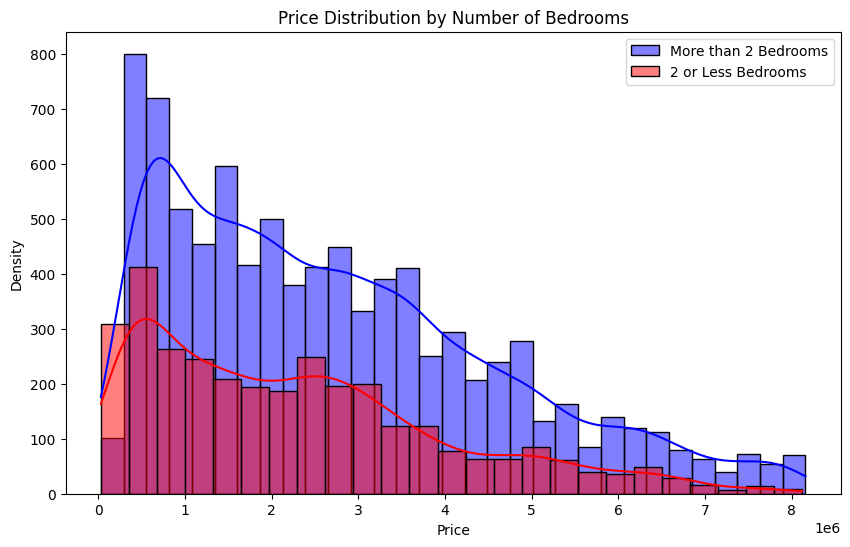

In [76]:
# Filter data for apartments based on bedroom number
more_than_2_bedrooms = df[df['Bedrooms'] > 2]['Price']
two_or_less_bedrooms = df[df['Bedrooms'] <= 2]['Price']

# Perform t-test
t_stat, p_val = stats.ttest_ind(more_than_2_bedrooms, two_or_less_bedrooms, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_val)

# Decision
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in prices.")

# Visual comparison
plt.figure(figsize=(10, 6))
sns.histplot(more_than_2_bedrooms, color="blue", label="More than 2 Bedrooms", kde=True)
sns.histplot(two_or_less_bedrooms, color="red", label="2 or Less Bedrooms", kde=True)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

#Performing Mann-Whitney U test
This cell conducts a Mann-Whitney U test to compare the medians of the prices for furnished and unfurnished apartments. It prints the U-statistic and p-value, and determines whether there is enough evidence to support the claim that furnished apartments have a higher median price.

U-statistic: 1408251.0 p-value: 0.006595274023152343
Reject the null hypothesis: Furnished apartments have a higher median price.


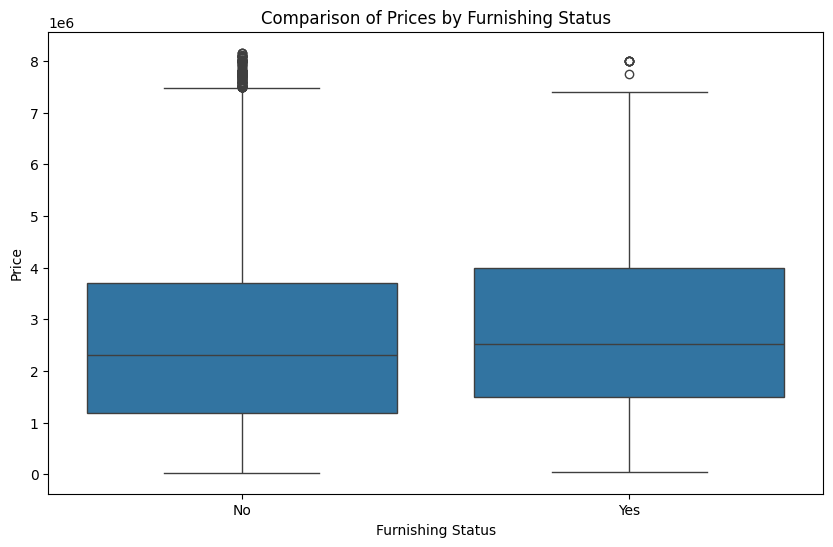

In [75]:
# Filter data for furnished and unfurnished apartments
furnished_prices = df[df['Furnished'] == 'Yes']['Price']
unfurnished_prices = df[df['Furnished'] == 'No']['Price']

# Perform Mann-Whitney U test (non-parametric test)
u_stat, p_val = stats.mannwhitneyu(furnished_prices, unfurnished_prices)
print("U-statistic:", u_stat, "p-value:", p_val)

# Decision
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Furnished apartments have a higher median price.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median prices.")

# Boxplot for visual comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Furnished', y='Price')
plt.title('Comparison of Prices by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()


#Performing ANOVA
This cell conducts an ANOVA to analyze price variability across the top three cities. It prints the F-statistic and p-value, and determines whether there is enough evidence to support the claim that there are significant differences in price variability across the top cities.

F-statistic: 27.17425632415007 p-value: 1.7739626882540428e-12
Reject the null hypothesis: Significant differences in price variability across top cities.


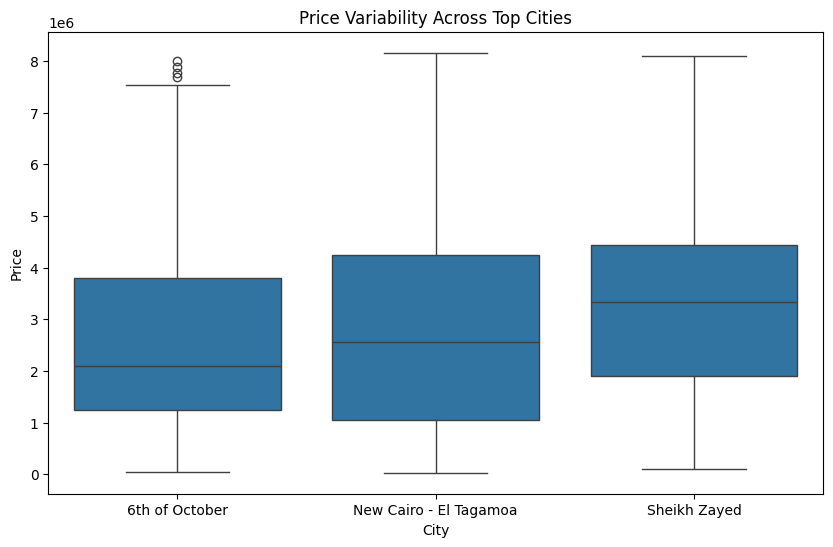

In [74]:
top_cities = df['City'].value_counts().nlargest(3).index
city_prices = [df[df['City'] == city]['Price'] for city in top_cities]
alpha = 0.05


f_stat, p_val = stats.f_oneway(*city_prices)
print("F-statistic:", f_stat, "p-value:", p_val)

if p_val < alpha:
    print("Reject the null hypothesis: Significant differences in price variability across top cities.")
else:
    print("Fail to reject the null hypothesis: No significant differences.")

# Boxplot for visual comparison of city prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['City'].isin(top_cities)], x='City', y='Price')
plt.title('Price Variability Across Top Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()


**CONCLUSION**

The Four tests on determinants of apartment prices have provided significant insights, including the mode of payment, number of bedrooms, furnishing status, and city-wise variation. The results indicate that apartments paid for in cash are cheaper than those paid for in installments. Additionally, apartment prices increase with the addition of extra bedrooms. Furnished apartments have a higher median price compared to unfurnished ones, and there is notable price variability across different top cities. These findings support a comprehensive approach to data-driven decision-making in apartment price setting.

**THANK YOU**